In [41]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [42]:
def load_img(img_path):
  image = tf.keras.preprocessing.image.load_img(img_path)
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = image / 255.0
  return image[tf.newaxis , ]

In [36]:
my_img = load_img('/content/122963515_707009660194247_5175846440627119802_n.jpg')
style_img = load_img('/content/Vassily_Kandinsky,_1913_-_Composition_7.jpg')

In [37]:
new_img = model(tf.constant(my_img) , tf.constant(style_img))

In [38]:
new_img_get = np.array(new_img[0][0] * 255 , dtype=np.uint8)

In [39]:
new_img_get.shape

(960, 968, 3)

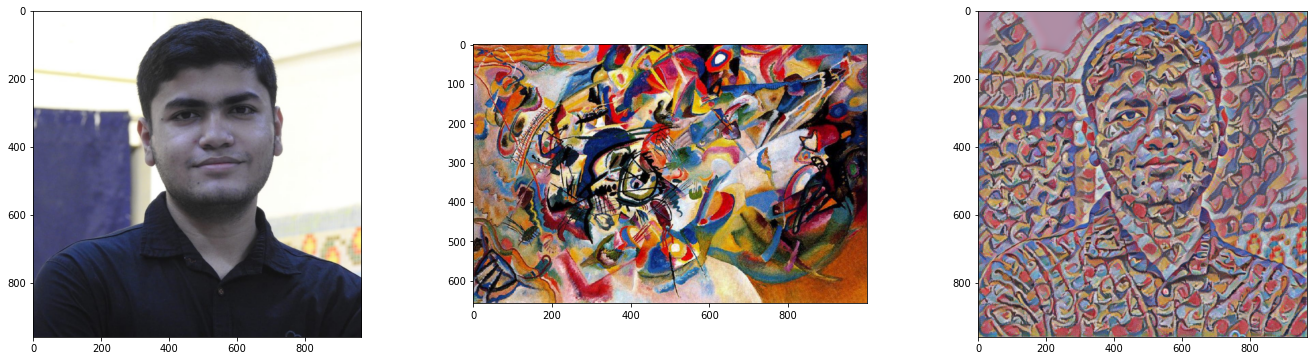

In [40]:
_ , ax = plt.subplots(1,3,figsize=(24,6))
ax[0].imshow(my_img[0])
ax[1].imshow(style_img[0])
ax[2].imshow(new_img_get)

In [43]:
def style_transfer(img1_path , img2_path , draw=True):
  my_img = load_img(img1_path)
  style_img = load_img(img2_path)
  new_img = model(tf.constant(my_img) , tf.constant(style_img))
  new_img_get = np.array(new_img[0][0] * 255 , dtype=np.uint8)
  if draw:
    _ , ax = plt.subplots(1,3,figsize=(24,6))
    ax[0].imshow(my_img[0])
    ax[1].imshow(style_img[0])
    ax[2].imshow(new_img_get)
  return new_img_get

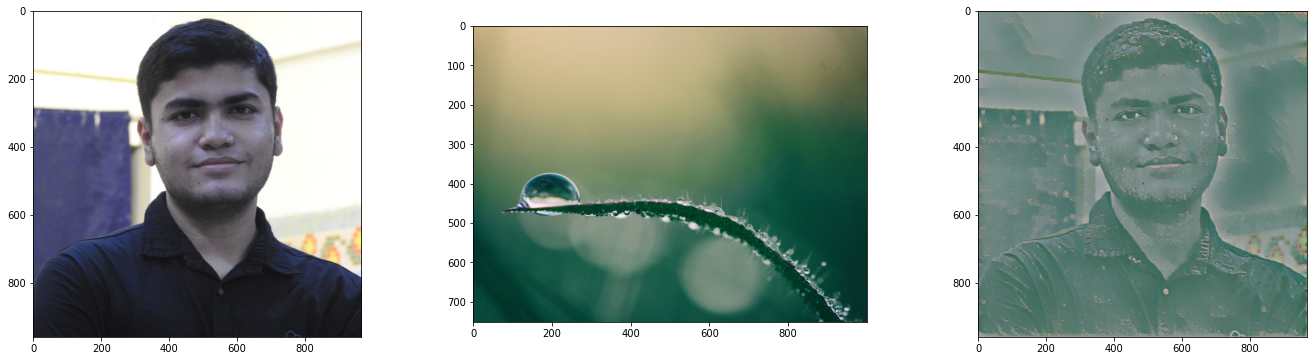

In [44]:
style_img1 = style_transfer(
    '/content/122963515_707009660194247_5175846440627119802_n.jpg',
    '/content/photo-1471879832106-c7ab9e0cee23.jfif'
)

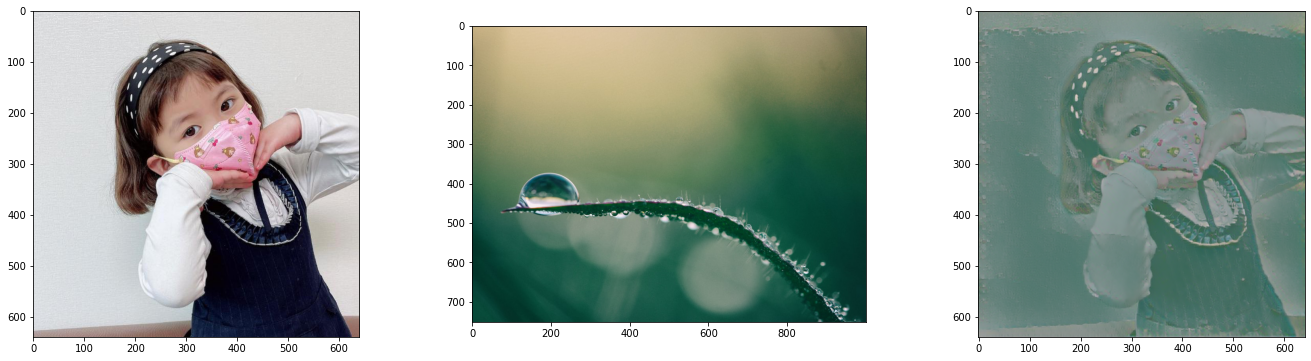

In [45]:
style_img1 = style_transfer(
    '/content/pp.jfif',
    '/content/photo-1471879832106-c7ab9e0cee23.jfif'
)

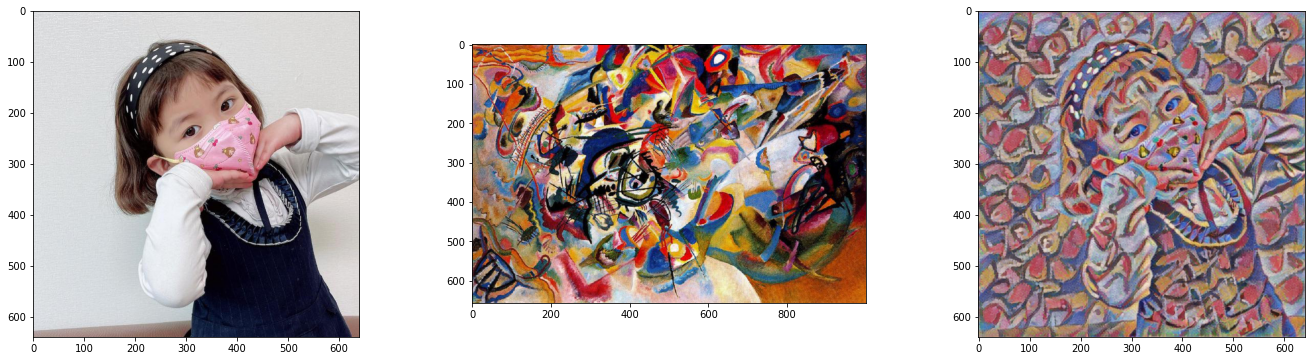

In [46]:
style_img1 = style_transfer(
    '/content/pp.jfif',
    '/content/Vassily_Kandinsky,_1913_-_Composition_7.jpg'
)

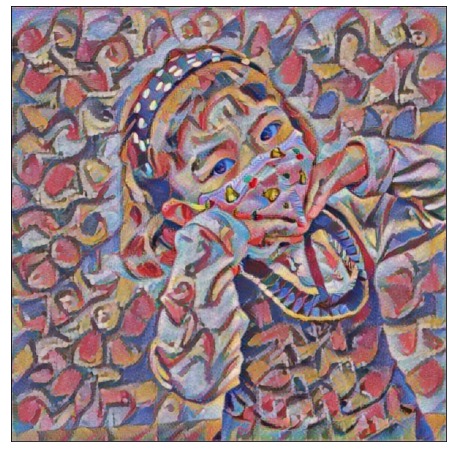

In [50]:
plt.figure(figsize=(16,8))
plt.xticks([])
plt.yticks([])
plt.imshow(style_img1)